In [1]:
import pandas as pd
import numpy as np

# Acquire:

In [2]:
df=pd.read_csv('youtube_us.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelTitle       200 non-null    object
 4   categoryId         200 non-null    int64 
 5   trending_date      200 non-null    object
 6   tags               200 non-null    object
 7   view_count         200 non-null    int64 
 8   likes              200 non-null    int64 
 9   comment_count      200 non-null    int64 
 10  thumbnail_link     200 non-null    object
 11  comments_disabled  200 non-null    bool  
 12  ratings_disabled   200 non-null    bool  
 13  description        200 non-null    object
 14  duration           200 non-null    object
 15  captions           200 non-null    bool  
dtypes: bool(3), int64(4), object(9)
memory usage

In [4]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
duration             0
captions             0
dtype: int64

In [5]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'description', 'duration', 'captions'],
      dtype='object')

In [6]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
duration             object
captions               bool
dtype: object

In [7]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions
0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30T07:04:52Z,CBS Sports HQ,17,22.31.10,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,1916,https://i.ytimg.com/vi/lVxm9Cuc5RY/default.jpg,False,False,Brian Campbell joins CBS Sports HQ to break do...,PT9M27S,False
1,Mn6S0TVYon4,Ross Chastain pulls off INSANE move on Denny H...,2022-10-30T22:50:49Z,Motorsports on NBC,17,22.31.10,nbc sports|nascar|nascar highlights|nascar new...,180610,2438,476,https://i.ytimg.com/vi/Mn6S0TVYon4/default.jpg,False,False,Ross Chastain pulls off the move of the season...,PT3M37S,True
2,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30T17:59:03Z,Magic: The Gathering,20,22.31.10,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,PT3M24S,True
3,1OZqvprj_Rk,Deleting My YouTube Channel.,2022-10-29T17:03:00Z,CoryxKenshin,20,22.31.10,deleting|my|youtube|channel|coryxkenshin|cory|...,6685520,773970,134039,https://i.ytimg.com/vi/1OZqvprj_Rk/default.jpg,False,False,Promise broken. Thank you for everything.,PT19M19S,False
4,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30T21:31:19Z,MMAWeekly.com,17,22.31.10,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,PT4M5S,False


In [8]:
df.ratings_disabled.nunique()

1

# prepare:

In [9]:
df.categoryId = df.categoryId.astype('object')

In [10]:
df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
df.publishedAt

0     2022-10-30 07:04:52+00:00
1     2022-10-30 22:50:49+00:00
2     2022-10-30 17:59:03+00:00
3     2022-10-29 17:03:00+00:00
4     2022-10-30 21:31:19+00:00
                 ...           
195   2022-10-25 19:00:32+00:00
196   2022-10-26 05:00:33+00:00
197   2022-10-23 20:00:40+00:00
198   2022-10-25 22:53:41+00:00
199   2022-10-25 17:36:29+00:00
Name: publishedAt, Length: 200, dtype: datetime64[ns, UTC]

In [11]:
df.trending_date = '22.31.10'

In [12]:
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
df.trending_date

0     2022-10-31 00:00:00+00:00
1     2022-10-31 00:00:00+00:00
2     2022-10-31 00:00:00+00:00
3     2022-10-31 00:00:00+00:00
4     2022-10-31 00:00:00+00:00
                 ...           
195   2022-10-31 00:00:00+00:00
196   2022-10-31 00:00:00+00:00
197   2022-10-31 00:00:00+00:00
198   2022-10-31 00:00:00+00:00
199   2022-10-31 00:00:00+00:00
Name: trending_date, Length: 200, dtype: datetime64[ns, UTC]

In [13]:
df['age']=(df.trending_date - df.publishedAt)

In [14]:
df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count

In [15]:
#adds sponsored column based on appearance of word sponsored in the description
df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
df[df.description.str.contains('sponsored')].shape

(3, 19)

In [16]:
def clean_duration(duration):

    if 'S' not in duration:
        duration += '00S'

    if duration.__contains__('M'):
        duration = int(duration.split('M')[0].split('T')[1]) * 60 + int(duration.split('M')[1][:-1])
    else:
        duration = int(duration[-3:-1])

    return duration

In [17]:
df['duration'] = df['duration'].apply(lambda x:clean_duration(x))

In [18]:
#making categorid into actual category titles
#all categoryId optain from youtube website
df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                   ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                   22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                   26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                   29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                   33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                   39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})

In [19]:
df['duration']

0       567
1       217
2       204
3      1159
4       245
       ... 
195      18
196     200
197    1395
198     577
199     962
Name: duration, Length: 200, dtype: int64

In [20]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,age,engagement,sponsored
0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30 07:04:52+00:00,CBS Sports HQ,Sports,2022-10-31 00:00:00+00:00,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,1916,https://i.ytimg.com/vi/lVxm9Cuc5RY/default.jpg,False,False,Brian Campbell joins CBS Sports HQ to break do...,567,False,0 days 16:55:08,0.028114,0
1,Mn6S0TVYon4,Ross Chastain pulls off INSANE move on Denny H...,2022-10-30 22:50:49+00:00,Motorsports on NBC,Sports,2022-10-31 00:00:00+00:00,nbc sports|nascar|nascar highlights|nascar new...,180610,2438,476,https://i.ytimg.com/vi/Mn6S0TVYon4/default.jpg,False,False,Ross Chastain pulls off the move of the season...,217,True,0 days 01:09:11,0.024041,0
2,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,204,True,0 days 06:00:57,0.001366,0
3,1OZqvprj_Rk,Deleting My YouTube Channel.,2022-10-29 17:03:00+00:00,CoryxKenshin,Gaming,2022-10-31 00:00:00+00:00,deleting|my|youtube|channel|coryxkenshin|cory|...,6685520,773970,134039,https://i.ytimg.com/vi/1OZqvprj_Rk/default.jpg,False,False,Promise broken. Thank you for everything.,1159,False,1 days 06:57:00,0.195965,0
4,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,245,False,0 days 02:28:41,0.020040,0


In [21]:
def prepare_youtube(df):
    df.categoryId = df.categoryId.astype('object')
    df.publishedAt = pd.to_datetime(df.publishedAt, utc=True)
    df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m', utc=True)
    df.trending_date = '22.31.10'
    df['age']=(df.trending_date - df.publishedAt)
    df['engagement'] = (df.likes + df.comment_count * 4 )/df.view_count
    df['sponsored'] = np.where(df.description.str.contains('sponsor'), 1, 0)
    df['duration'] = df['duration'].apply(lambda x:clean_duration(x))
    #making categorid into actual category titles
    #all categoryId optain from youtube website
    df.categoryId = df.categoryId.map({1: 'Film_Animation', 2: 'Autos_Vehicles',10:'Music',15: 'Pets_Animals'
                                       ,17:'Sports',18:'Short_Movies',19:'Travel_Events',20:'Gaming',21:'Videoblogging',
                                       22:'People_Blogs',23:'Comedy',24:'Entertainment',25:'News_Politics',
                                       26:'Howto_Style',27: 'Education',28: 'Science_Technology', 
                                       29:'Nonprofits_Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',
                                       33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',
                                       39:'Horror',40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42:'Shorts',43:'Shows',44:'Trailers'})
    return df


# Explore:

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# comments_disabled view count 

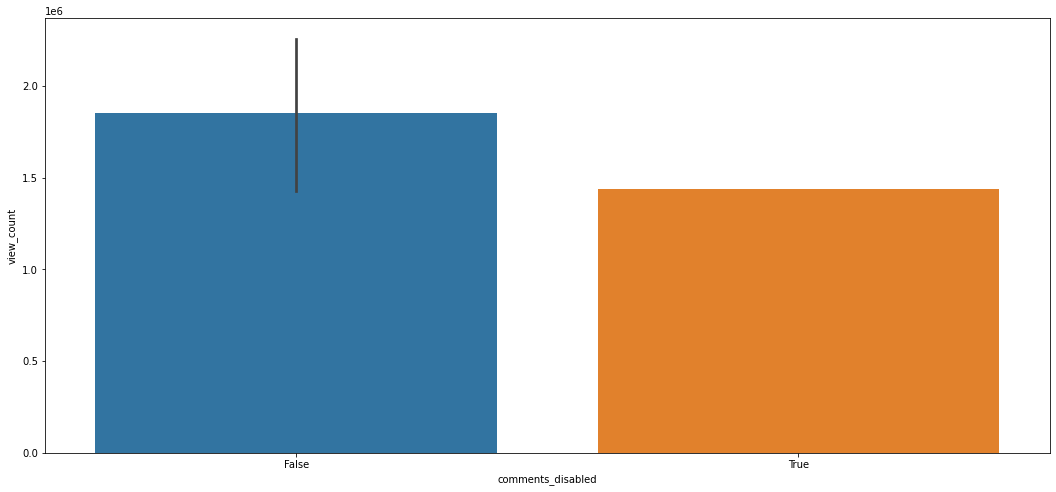

In [23]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='comments_disabled',y='view_count')
plt.show()

In [24]:
def pie_chart1(df):
    labels = pd.concat([df.comments_disabled.value_counts(),df.comments_disabled.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['comments_disabled']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

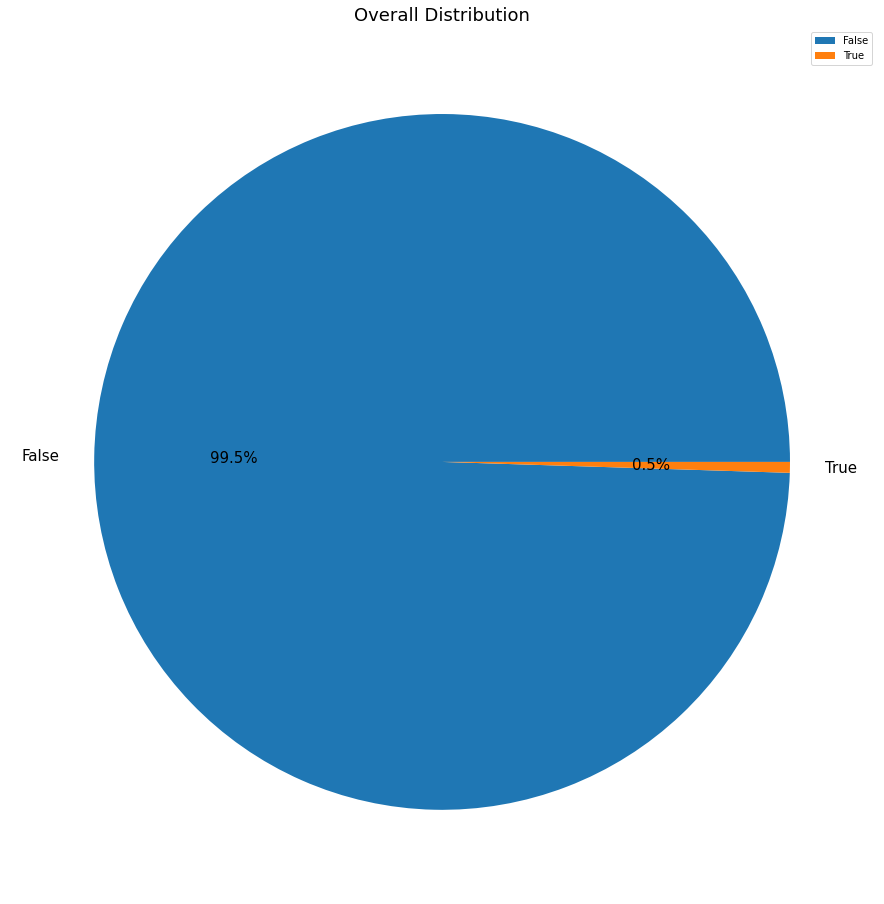

In [25]:
pie_chart1(df)

# comment_count

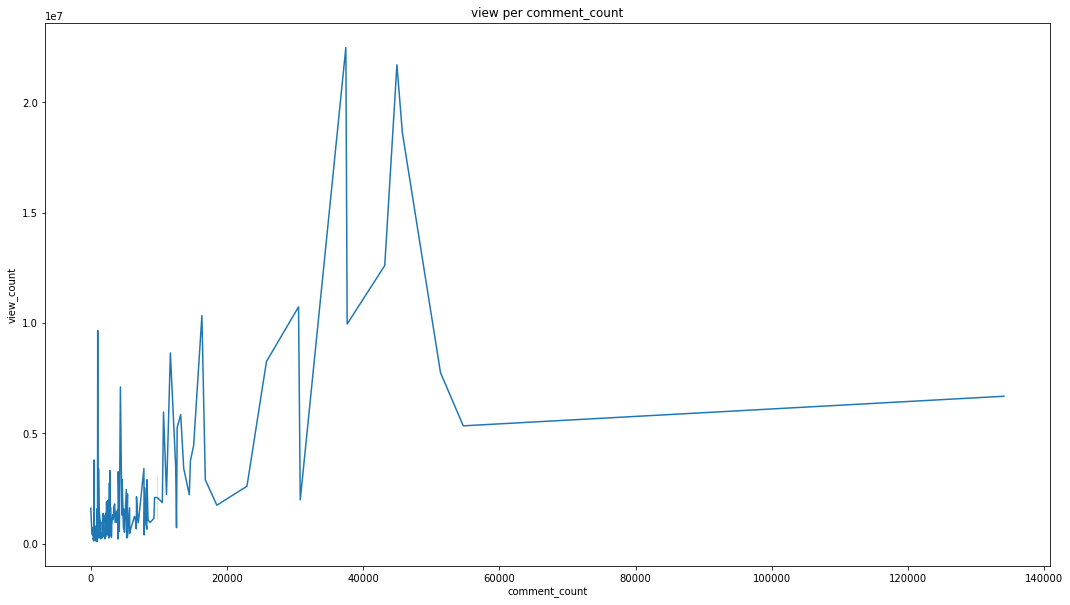

In [26]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count')
plt.title('view per comment_count')
plt.show()

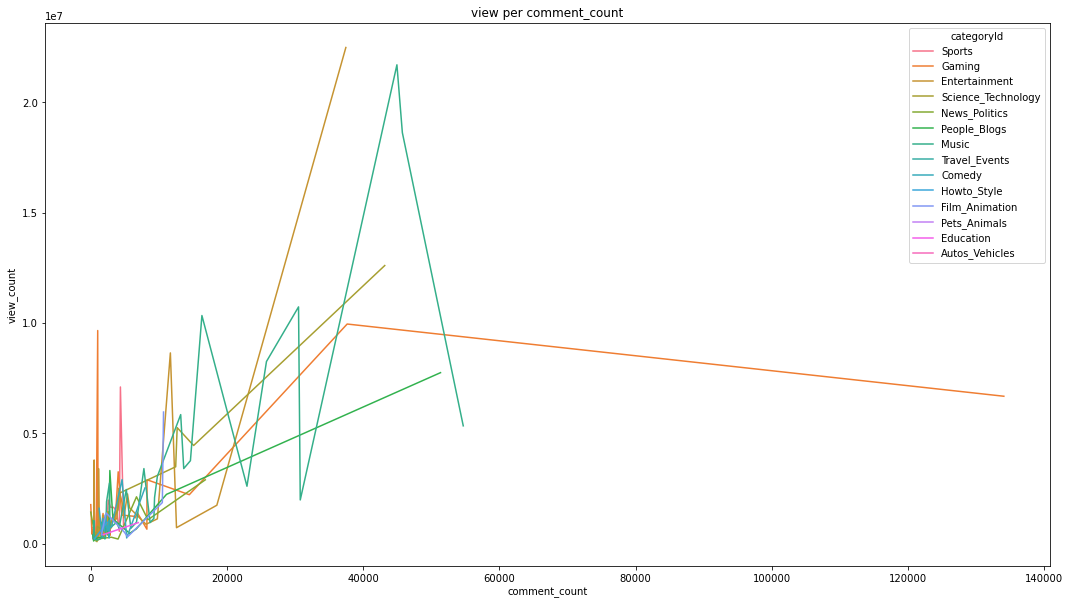

In [27]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.lineplot(data=df,x='comment_count',y='view_count',hue='categoryId')
plt.title('view per comment_count')
plt.show()

# rating disabled views:

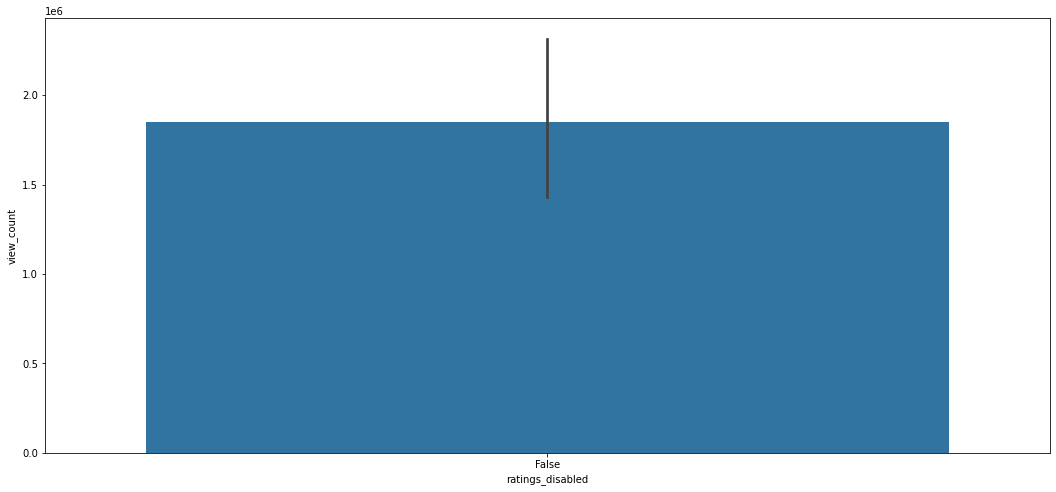

In [28]:
plt.figure(figsize=(18,8))

sns.barplot(data=df,x='ratings_disabled',y='view_count')
plt.show()

In [29]:
df.ratings_disabled.nunique()

1

# categoryId to views... 
# Which video category has the largest number of trending videos?

In [30]:
df.categoryId.unique()

array(['Sports', 'Gaming', 'Entertainment', 'Science_Technology',
       'News_Politics', 'People_Blogs', 'Music', 'Travel_Events',
       'Comedy', 'Howto_Style', 'Film_Animation', 'Pets_Animals',
       'Education', 'Autos_Vehicles'], dtype=object)

In [31]:
#making categorid into actual category titles
# df.categoryId = df.categoryId.map({10: 'Music', 25: 'News_Politics', 20:'Gaming',24:'Entertainment',
#                                       17:'Sports',23:'Comedy',22:'People_Blogs',1:'Film_Animation',28:'Science_Technology',
#                                       2:'Autos_Vehicles',19:'Travel_Events',26:'Howto_Style',27:'Education'})

In [32]:
df.categoryId

0                  Sports
1                  Sports
2                  Gaming
3                  Gaming
4                  Sports
              ...        
195                 Music
196          People_Blogs
197    Science_Technology
198         Entertainment
199                Gaming
Name: categoryId, Length: 200, dtype: object

In [33]:
df.categoryId.unique()

array(['Sports', 'Gaming', 'Entertainment', 'Science_Technology',
       'News_Politics', 'People_Blogs', 'Music', 'Travel_Events',
       'Comedy', 'Howto_Style', 'Film_Animation', 'Pets_Animals',
       'Education', 'Autos_Vehicles'], dtype=object)

In [34]:
def pie_chart2(df):
    labels = pd.concat([df.categoryId.value_counts(),df.categoryId.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    plt.figure(figsize=(16,16))
    mylabels = df['categoryId']
    textprops = {"fontsize":15}
    textprops = {"fontsize":15}
    plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
    plt.legend()
    plt.title('Overall Distribution',fontsize=18)
    plt.show() 

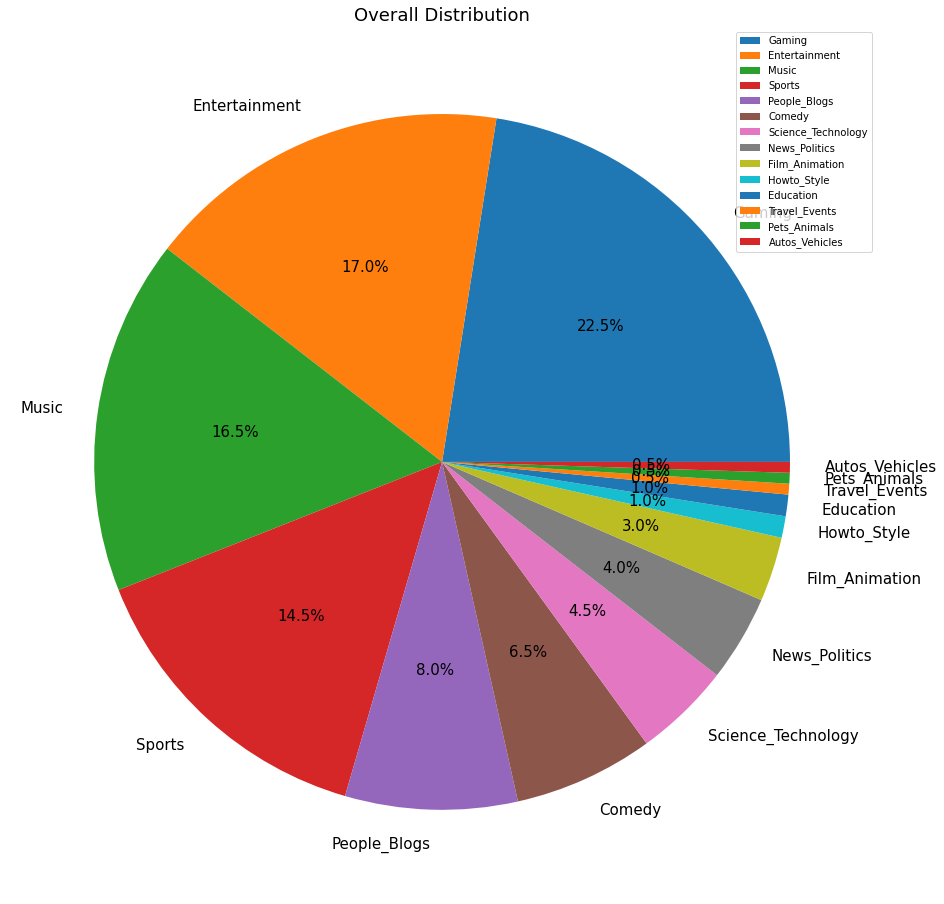

In [35]:
#overall count of category
pie_chart2(df)

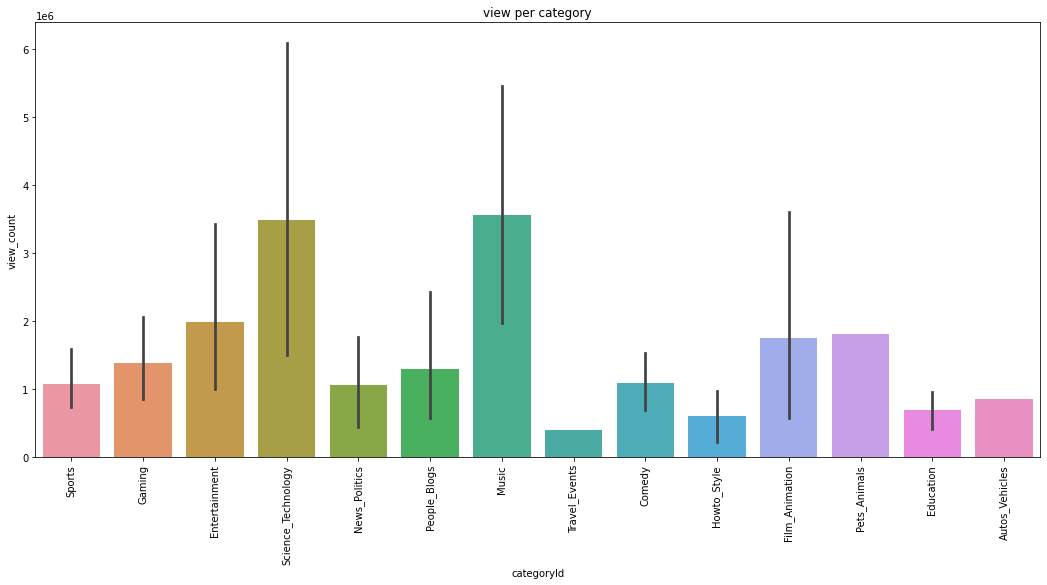

In [36]:
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
plt.show()

In [37]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 10,rotation=90)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12,rotation=90)
        
# def pie_chart1(df):
#     labels = pd.concat([df.clean_lang.value_counts(),df.clean_lang.value_counts(normalize=True)], axis=1)
#     labels.columns = ['n', 'percent']
#     plt.figure(figsize=(16,16))
#     mylabels = df['clean_lang']
#     textprops = {"fontsize":15}
#     textprops = {"fontsize":15}
#     plt.pie(labels.percent, labels = labels.index, textprops=textprops, autopct='%.1f%%')
#     plt.legend()
#     plt.title('Overall Language Distribution',fontsize=18)
#     plt.show() 
    

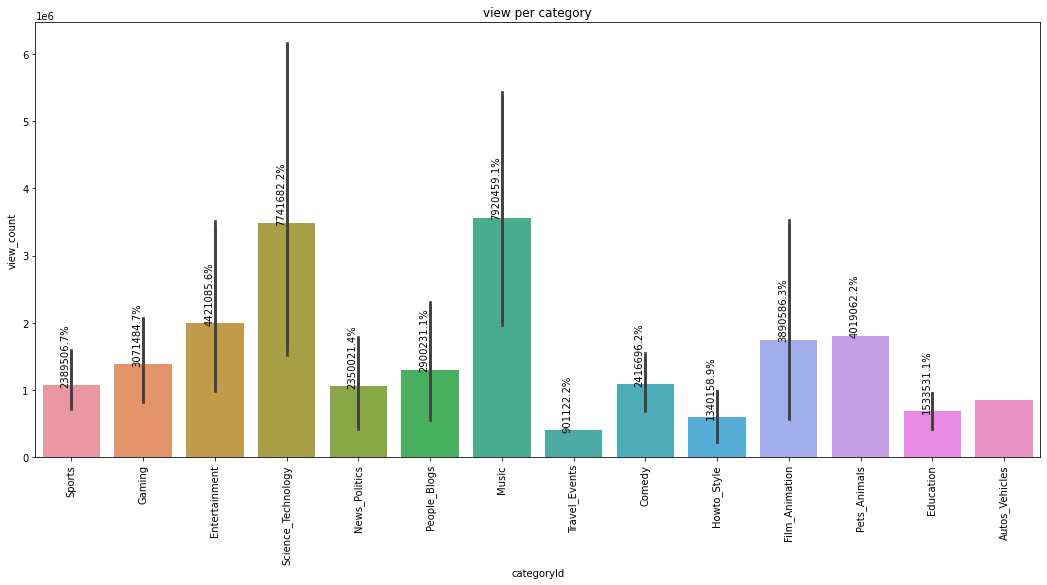

In [38]:
#fix the percentages
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
ax=sns.barplot(data=df,x='categoryId',y='view_count')
with_hue(ax, df.categoryId,1,13)

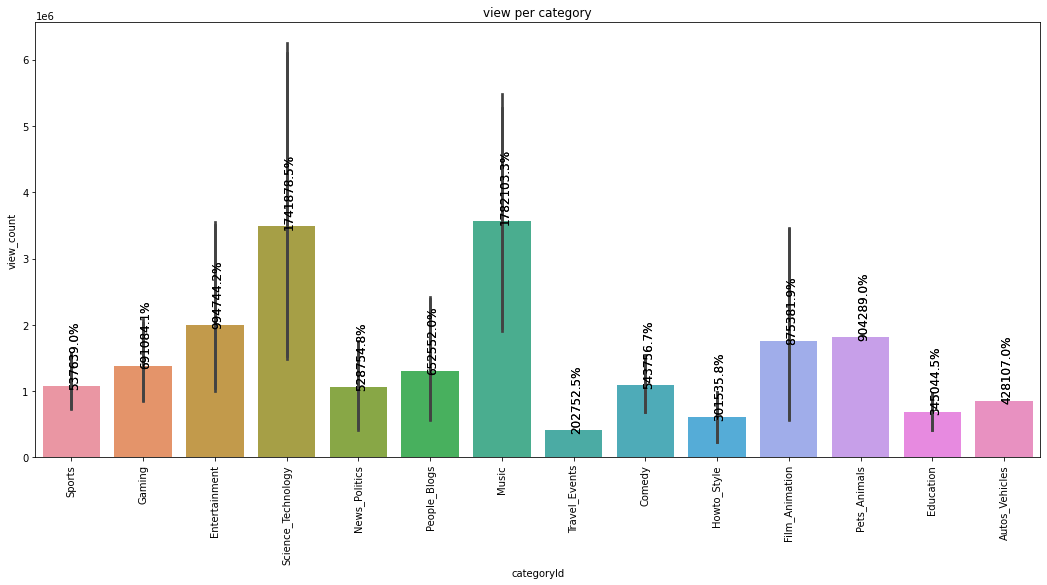

In [39]:
#fix the percentages
plt.figure(figsize=(18,8))
sns.barplot(data=df,x='categoryId',y='view_count')
plt.title('view per category')
plt.xticks(rotation=90)
ax=sns.barplot(data=df,x='categoryId',y='view_count')
without_hue(ax, df['categoryId'])

# duration effecct view count !
# Does that information change based on length, category, and global region?


/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_11753/2319380267.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


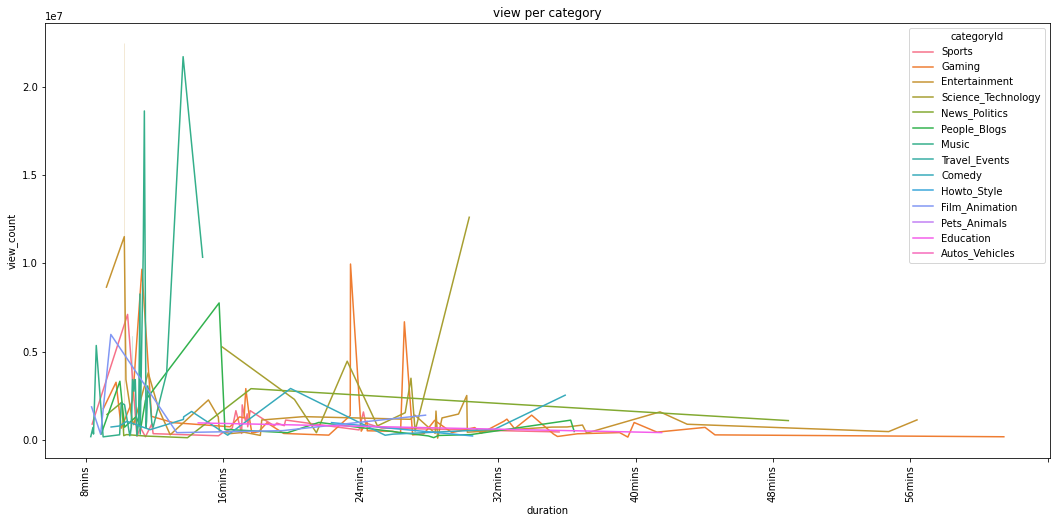

In [40]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='duration',y='view_count',hue='categoryId')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

/var/folders/48/yvmx1zqx06d_njrv4sh14c6m0000gn/T/ipykernel_11753/3005040862.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])


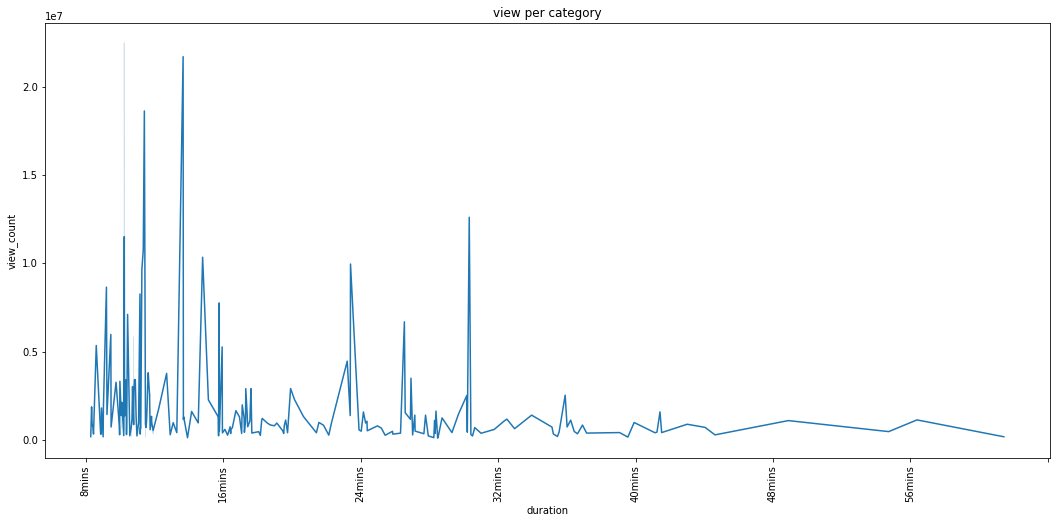

In [41]:
plt.figure(figsize=(18,8))
g=sns.lineplot(data=df,x='duration',y='view_count')
plt.title('view per category')
g.set_xticklabels(['8','8mins','16mins','24mins','32mins','40mins','48mins','56mins'])
plt.xticks(rotation=90)
plt.show()

# What is a viral video? How long does it a take for a video to go viral?Create feature based on virality

In [42]:
df.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,duration,captions,age,engagement,sponsored
0,lVxm9Cuc5RY,"Jake Paul KNOCKS DOWN Anderson Silva late, win...",2022-10-30 07:04:52+00:00,CBS Sports HQ,Sports,2022-10-31 00:00:00+00:00,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,368933,2708,1916,https://i.ytimg.com/vi/lVxm9Cuc5RY/default.jpg,False,False,Brian Campbell joins CBS Sports HQ to break do...,567,False,0 days 16:55:08,0.028114,0
1,Mn6S0TVYon4,Ross Chastain pulls off INSANE move on Denny H...,2022-10-30 22:50:49+00:00,Motorsports on NBC,Sports,2022-10-31 00:00:00+00:00,nbc sports|nascar|nascar highlights|nascar new...,180610,2438,476,https://i.ytimg.com/vi/Mn6S0TVYon4/default.jpg,False,False,Ross Chastain pulls off the move of the season...,217,True,0 days 01:09:11,0.024041,0
2,L2DGv2bmsqo,Dawn of the Phyrexian Invasion - Official Cine...,2022-10-30 17:59:03+00:00,Magic: The Gathering,Gaming,2022-10-31 00:00:00+00:00,magic|mtg|wizards|wotc|planeswalkers|tcg|tradi...,9660567,9111,1021,https://i.ytimg.com/vi/L2DGv2bmsqo/default.jpg,False,False,Phyrexians have taken root in Dominaria as a s...,204,True,0 days 06:00:57,0.001366,0
3,1OZqvprj_Rk,Deleting My YouTube Channel.,2022-10-29 17:03:00+00:00,CoryxKenshin,Gaming,2022-10-31 00:00:00+00:00,deleting|my|youtube|channel|coryxkenshin|cory|...,6685520,773970,134039,https://i.ytimg.com/vi/1OZqvprj_Rk/default.jpg,False,False,Promise broken. Thank you for everything.,1159,False,1 days 06:57:00,0.195965,0
4,Qa3anjyAMgc,Jake Paul vs Anderson Silva HIGHLIGHTS,2022-10-30 21:31:19+00:00,MMAWeekly.com,Sports,2022-10-31 00:00:00+00:00,MMA|mixed martial arts|MMAWeekly.com|MMAWeekly...,354985,2926,1047,https://i.ytimg.com/vi/Qa3anjyAMgc/default.jpg,False,False,See the highlights from Jake Paul vs Anderson ...,245,False,0 days 02:28:41,0.020040,0


In [45]:
df.publishedAt.nunique()

198